***SQL Queries from Excel with VBA***

VBA project presented as python notebook.

It comes to a userform that brings data from SQL Server, there are already some examples on the web but I did it with a couple of extra features: 


*   Multiple requests making over different sheets.
*   Direct consultation of database, table and column names at the userform through ComboBoxes.

Its relevance resides in allowing to make direct spreadsheet calculations with the requested data. 

USE EXAMPLE

Notes: 

* I'm not sure if by getting the IP and breaking the password it's possible to hack and get remote access to a server, so I'm gonna hide my username and upload the templante without my userdata.
*Used Database is a mock generic one offered by SQL Server for practicing. So private data are not real.

You have to enter your password, server and user namer only the first time or when changing server. Then press the "Connect Server" button to consult the names of your DataBases, their tables and their tables columns. 

Once you select the database you can write your query code and make the request by pressing "Ok".

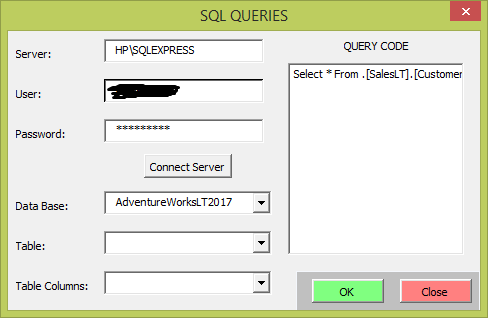

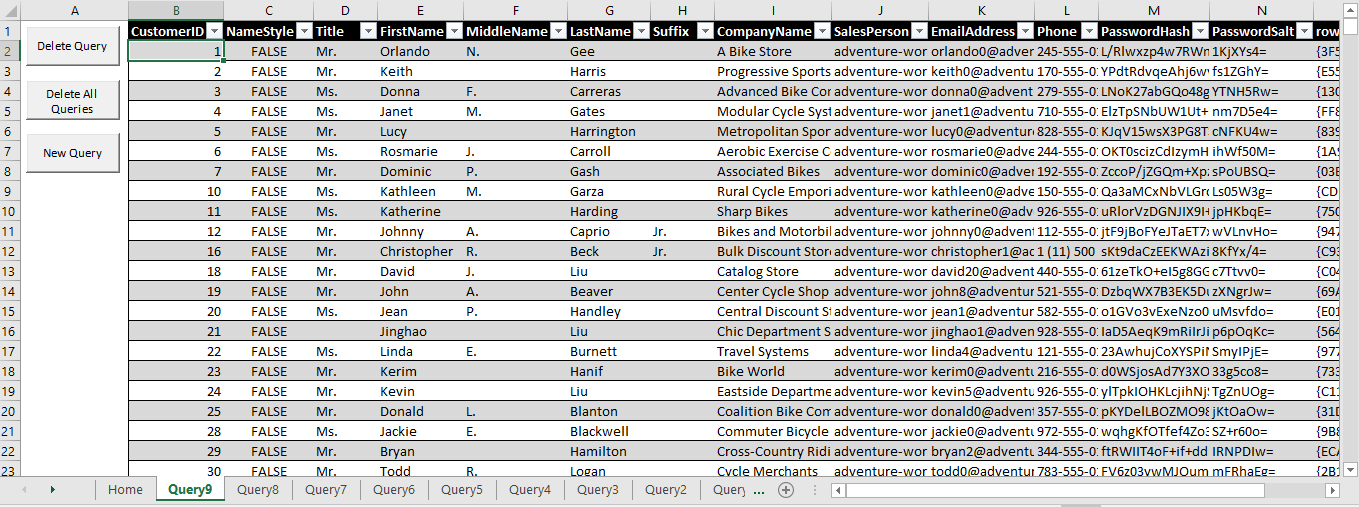

Consulting Comboboxes example:

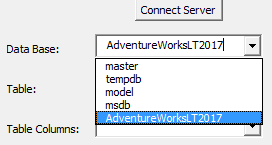

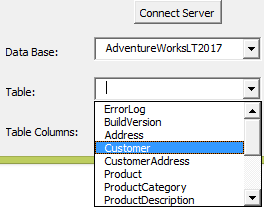

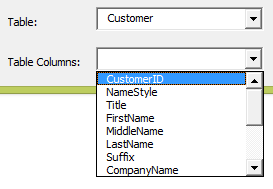

Module 1 contents:


*   Query function to populate comboboxes.
*   Query function to bring SQL data to sheets.
*   Macro for userform throwing
*   Macro to format data as table or dataframe.




In [ ]:
'SQL request function to populate the three comboboxes at the userform
'Sql query and combobox to fill as parameters
Function ConnectSQL_Combos(single_query As String, CBbox As ComboBox)
Dim Connect As Object

'Errors handling
On Error GoTo Errormsg

'Create an ADO connection
Set Connect = CreateObject("ADODB.Connection")


'Variables for user initial connection parameters
With SQLFORM
    server = .Txt_server.Value
    user = .txt_user.Value
    Password = .txt_password.Value
    Db = Sheet1.Range("A6").Value
End With

'Connection starting parameters
'In addition to user parameters there is also the type of provider, this case SQL.
Connection = "Provider=SQLOLEDB;" & "password=" & Password & ";" & _
           "User ID=" & user & ";" & "Initial Catalog=" & Db & ";" & "Data Source=" & server

Connect.ConnectionString = Connection

'Database opening
Connect.Open

'Verify the query input is not empty
'If single_query <> vbNullString Then

'ADO recordset variable to save the query output
Dim RecordSet As Object
Set RecordSet = CreateObject("ADODB.Recordset")

'Request made by the given query and connection
RecordSet.Open single_query, Connect

'With RecordSet
'Get the output elements
Dim a
a = RecordSet.GetRows
For Each Row In a      'Loop to add each element to the given combobox
  CBbox.AddItem Row
Next
'End With

'Finish connection and request
'Error skip in case they were already finished
On Error Resume Next
RecordSet.Close
Connect.Close
Set Connect = Nothing    'to free memory
Set RecordSet = Nothing  'to free memory
'End If
Exit Function

' Throw dynamic (variable) errors
Errormsg:
MsgBox "ERROR: " & Err.Description, vbExclamation, "SQLServer Queries"
End Function


'------------------------------------------------------------------------------------------------------------------------------------'


'Show userform
Sub throwform()
SQLFORM.Show
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'SQL request function to get dataframes into new excel sheets
'Sql query as parameter
Function ConnectSQL_queries(single_query As String)
Dim Connect As Object
Dim sheets_No As Integer

'sheets counter for reference and to avoid buttons duplicated names
sheets_No = Application.Sheets.Count

'Errors handling
On Error GoTo Errormsg


'Create an ADO connection
Set Connect = CreateObject("ADODB.Connection")

'Variables for user initial connection parameters
With SQLFORM
    server = .Txt_server.Value
    user = .txt_user.Value
    Password = .txt_password.Value
    Db = .DB_combo.Value
End With

'Connection starting parameters
'In addition to user parameters there is also the type of provider, this case SQL.
Connection = "Provider=SQLOLEDB;" & "password=" & Password & ";" & _
           "User ID=" & user & ";" & "Initial Catalog=" & Db & ";" & "Data Source=" & server

Connect.ConnectionString = Connection
'Database opening
Connect.Open

'Validación que verifica que los parámetros no estén vacíos
'If single_query <> vbNullString Then

 'ADO recordset variable to save the query output
 Dim RecordSet As Object
 Set RecordSet = CreateObject("ADODB.Recordset")

 'Request made by the given query and connection
 RecordSet.Open single_query, Connect
 Application.ScreenUpdating = False
 'Sheet addition for get the query there
 'Appended after "Home" Sheet with index in name to avoid name duplicates
 Sheets.Add(After:=Sheet1).Name = "Query" & sheets_No
 'Hide gridlines for a nicer view
 ActiveWindow.DisplayGridlines = False
 
 'Add query headers (Headers are not added by default) starting on column B
 For iCols = 0 To RecordSet.Fields.Count - 1
 ActiveSheet.Cells(1, iCols + 2).Value = RecordSet.Fields(iCols).Name
 Next
 
 'Add query data below its headers
 ActiveSheet.Range("B2").CopyFromRecordset RecordSet
 'Increase A column width to add buttons
 ActiveSheet.Columns("A").ColumnWidth = ActiveSheet.Columns("A").ColumnWidth * 1.75

'Command Buttons addition by calling their functions
 Call add_singledel_button
 Call add__multidel_button
 Call add__newquery_button
 
 'Finish connection and request
 'Error skip in case they were already finished
 On Error Resume Next
 RecordSet.Close
 Connect.Close
 Set Connect = Nothing    'to free memory
 Set RecordSet = Nothing  'to free memory
'End If

'Call macro for data formatting
ActiveSheet.Range("B2").Select 'to avoid format first column
Call datatable_format
Application.ScreenUpdating = True
Exit Function

' Throw dynamic (variable) errors
Errormsg:
MsgBox "ERROR: " & Err.Description, vbExclamation, "SQLServer Queries"
End Function


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro to format data as table
Sub datatable_format()

Dim no_sheets As Integer
Dim table_name As String

no_sheets = Application.Sheets.Count
table_name = "table" & no_sheets
'Specify kind of source, source and if table has headers
ActiveSheet.ListObjects.Add(xlSrcRange, ActiveSheet.UsedRange, , xlYes).Name = table_name
ActiveSheet.ListObjects(table_name).TableStyle = "TableStyleMedium1"
ActiveSheet.ListObjects.Add
End Sub


Module 2 contents:


*   Macros to call fill combobox function



In [ ]:
'Macro to call combobox population function (Database combobox)
Sub populateDB_combo()

'Declare the parameters(query and the combobox to fill)
Dim single_query As String
Dim CBbox As ComboBox

'Generic query to get Databases available at the server
single_query = "SELECT name FROM sys.databases;"
Set CBbox = SQLFORM.DB_combo

'Function Call
Call ConnectSQL_Combos(single_query, CBbox)
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro to call combobox population function (Datatables combobox)
Sub populateTABLE_combo()

'Declare the parameters(query and the combobox to fill)
Dim single_query As String
Dim CBbox As ComboBox

'Query for get datatables available in the selected DataBase
single_query = "SELECT TABLE_NAME FROM information_schema.tables;"
Set CBbox = SQLFORM.Table_combo
'Function Call

Call ConnectSQL_Combos(single_query, CBbox)
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro to call combobox population function (Table columns combobox)
Sub populateCOLUMNS_combo()

'Declare the parameters(query and the combobox to fill)
Dim single_query As String
Dim CBbox As ComboBox
Dim selected_table As String

'To fill this cmbox is needed to get the datatable selected first
selected_table = SQLFORM.Table_combo.Value

'Query with the table variable to get the columns available
single_query = "SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '" & selected_table & "'"
Set CBbox = SQLFORM.columns_combo

'Function Call
Call ConnectSQL_Combos(single_query, CBbox)
End Sub


Module 3 contents:


*   Macro to delete single query
*   Macro to rename sheets
* Macro to delete all queries
* Macro for adding single query deletion button
* Macro for adding all queries deletion button
* Macro for adding new queries button

In [ ]:
'Macro to delete single sheet
Sub delete_sheet()

'Screen changes hidden and afirmation question disabled
Application.ScreenUpdating = False
Application.DisplayAlerts = False

ThisWorkbook.ActiveSheet.Delete

Application.DisplayAlerts = True
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro to rename the sheets after a sheet was deleted
Sub rename_sheets()
Dim x As Integer
Dim y As Integer
no_sheets = Application.Sheets.Count
x = 1

'Reverse for loop to rename sheets (to avoid duplicated names
'when renaming them)(Except the "Home" sheet)
For y = no_sheets To 2 Step -1

    Sheets(y).Name = "Query" & x
    x = x + 1
Next
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro for deleting all queries sheets
Sub DeleteAllSheetsButFirst()

Dim sht As Worksheet
Application.ScreenUpdating = False
Application.DisplayAlerts = False
    For Each sht In ActiveWorkbook.Sheets
        If sht.Index <> 1 Then       '"Home" sheet exception
            sht.Delete
        End If
    Next
Application.DisplayAlerts = True
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro for adding single sheet deletion button to a new sheet
Sub add_singledel_button()

Application.ScreenUpdating = False
Dim commbutton As Object 'Declared as object cause CommButton is not too customizable
Dim button_name As String
Dim sheets_No As Integer
sheets_No = Application.Sheets.Count  'Sheets counter to join to the button name
button_name = "Singledel_button" & sheets_No

With ActiveSheet
'Insert it as OLE Commbutton and assign size and position
    Set commbutton = .OLEObjects.Add(ClassType:="Forms.CommandButton.1", _
                               Link:=False, DisplayAsIcon:=False, Left:=5, _
                               Top:=5, Width:=70, Height:=30)
                                                                                                         
'Assign name, caption and font size
    commbutton.Name = button_name
    commbutton.Object.Caption = "Delete Query"
    .Shapes(button_name).DrawingObject.Object.Font.Size = 10
                                
'Code string variable to run when pushing the button
'This case delete single sheet and rename sheets macros are called
    Code = "Sub " & button_name & "_Click()" & vbCrLf & _
            "Call delete_Sheet" & vbCrLf & _
            "Call rename_sheets" & vbCrLf & _
            "End Sub"
'vbCrLf is for line breaking when passing the code to the button

'Assigning the code to the button
    With .Parent.VBProject.VBComponents(.CodeName).CodeModule
        .insertlines .CountOfLines + 1, Code
    End With
End With
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro for adding all sheets deletion button to a new sheet
'Almost same stuff but not enough to make it as function
Sub add__multidel_button()

Application.ScreenUpdating = False
Dim commbutton As Object
Dim button_name As String
Dim sheets_No As Integer
sheets_No = Application.Sheets.Count
button_name = "multidel_button" & sheets_No

With ActiveSheet
'Insert it as OLE Commbutton and assign size and position
    Set commbutton = .OLEObjects.Add(ClassType:="Forms.CommandButton.1", _
                               Link:=False, DisplayAsIcon:=False, Left:=5, _
                               Top:=45, Width:=70, Height:=30)
                               
'Assign name, caption and font size
    commbutton.Name = button_name
    commbutton.Object.Caption = "Delete All" & vbCrLf & "Queries"
    .Shapes(button_name).DrawingObject.Object.Font.Size = 10
                                 
'Code string variable to run when pushing the button
'This case macro to delete all queries is called
    Code = "Sub " & button_name & "_Click()" & vbCrLf & _
            "Call DeleteAllSheetsButFirst" & vbCrLf & _
            "End Sub"
'vbCrLf is for line breaking when passing the code to the button

'Assigning the code to the button
    With .Parent.VBProject.VBComponents(.CodeName).CodeModule
        .insertlines .CountOfLines + 1, Code
    End With
End With
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro for making new queries button to a new sheet
'Almost same stuff but not enough to make it as function
Sub add__newquery_button()

Application.ScreenUpdating = False
Dim commbutton As Object
Dim button_name As String
Dim sheets_No As Integer
sheets_No = Application.Sheets.Count
button_name = "newquery_button" & sheets_No

With ActiveSheet
'Insert it as OLE Commbutton and assign size and position
    Set commbutton = .OLEObjects.Add(ClassType:="Forms.CommandButton.1", _
                               Link:=False, DisplayAsIcon:=False, Left:=5, _
                               Top:=85, Width:=70, Height:=30)
                               
'Assign name, caption and font size
    commbutton.Name = button_name
    commbutton.Object.Caption = "New Query"
    .Shapes(button_name).DrawingObject.Object.Font.Size = 10
                                
'Code string variable to run when pushing the button
'This case macro to make new queries is called
    Code = "Sub " & button_name & "_Click()" & vbCrLf & _
            "Call throwform" & vbCrLf & _
            "End Sub"
'vbCrLf is for line breaking when passing the code to the button
           
'Assigning the code to the button
    With .Parent.VBProject.VBComponents(.CodeName).CodeModule
        .insertlines .CountOfLines + 1, Code
    End With
End With
Application.ScreenUpdating = True
End Sub


Userform Code

Macros and called functions for userform interaction.



In [ ]:
'Ok button press event
Private Sub CommandButton1_Click()
Dim single_query As String

'Query input to a variable
single_query = Me.txt_query.Value

'Avoid errors if there is not query
If single_query = "" Then
    MsgBox "You must enter a Query", , "SQL Requests"
    Exit Sub
End If

Application.ScreenUpdating = False 'Hide screen changes

'Call dataframes queries function
Call ConnectSQL_queries(single_query)
        
Me.txt_query.SetFocus 'Query space selected for quick new queries
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Close button
Private Sub CommandButton2_Click()
Unload Me
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro for automatically fill Databases combobox and then the others
Private Sub conn_serv_CMbutton_Click()
Application.ScreenUpdating = False
With SQLFORM
'error prevention
If .Txt_server = "" Or .txt_password = "" Or .txt_user = "" Then
MsgBox "Must fill your whole server data", , "SQLServer Queries"
Exit Sub
End If

'Generic database present in all servers needed to fill the DB combobox
Sheet1.Range("A6").Value = "master"

'Prevent accumulate repeated or keep last elements
.DB_combo.Clear
.Table_combo.Clear
.columns_combo.Clear

Call populateDB_combo
'Tables CMbox depends on DB and Columns CMbox depends on Tables, so their functions
'are called in afterupdate events

End With
Application.ScreenUpdating = True
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'


'Macro after select DataBase
Private Sub DB_combo_AfterUpdate()
'Tables depends on the DB, then is needed first to empty it and
Table_combo.Clear
Sheet1.Range("A6").Value = Me.DB_combo.Value
Call populateTABLE_combo 'then add the new tables to it.
End Sub


'------------------------------------------------------------------------------------------------------------------------------------'

'Macro select table to consult its columns
Private Sub Table_combo_AfterUpdate()
columns_combo.Clear 'Columns depends on the Tables, then is needed first to empty it
Call populateCOLUMNS_combo 'and then add the new columns to it
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro to save password for future connections
Private Sub txt_password_Change()
Sheet1.Range("A5").Value = Me.txt_password.Value
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro to save query for next request
Private Sub txt_query_Change()
Sheet1.Range("A7").Value = Me.txt_query.Value
End Sub

'Macro to save server for future connections
Private Sub Txt_server_Change()
Sheet1.Range("A3").Value = Me.Txt_server.Value
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Macro to save user for future connections
Private Sub txt_user_Change()
Sheet1.Range("A4").Value = Me.txt_user.Value
End Sub

'------------------------------------------------------------------------------------------------------------------------------------'

'Code to run when the userform is opened.
Private Sub UserForm_Initialize()
With Sheet1

'Open the userform with the last parameters
Me.Txt_server.Value = .Range("A3").Value
Me.txt_user.Value = .Range("A4").Value
Me.txt_password.Value = .Range("A5").Value
Me.DB_combo.Value = .Range("A6").Value
Me.txt_query.Value = .Range("A7").Value
End With
End Sub


Book initialize event

In [ ]:
'Macro to show userform when book is opened
Private Sub Workbook_Open()
Call throwform 
End Sub
